In [51]:
#Importanto biblioteca
import pandas as pd


In [52]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#Juntar os arquivos para trabalhar apenas com um
df= pd.concat([df1,df2,df3,df4,df5])

In [4]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
#Exibindo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [49]:
#a soma da quantidade de produtos ventidos em todas as cidades
df["Qtde"].sum()

2916

#TRATANDO VALORES FALTANTES

In [55]:
#CONSULTANDO LINHAS FALTANTES
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [64]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [65]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [10]:
#Fazemos isto para saber o valor de cada cidade
Salvador_vendas = df.loc[df["Cidade"] == "Salvador"]
Recife_vendas = df.loc[df["Cidade"] == "Recife"]
Aracaju_vendas = df.loc[df["Cidade"] == "Aracaju"]
Fortaleza_vendas = df.loc[df["Cidade"] == "Fortaleza"]
Natal_vendas = df.loc[df["Cidade"] == "Natal"]

In [36]:
#Valor vendido em Salvador
total_salvador_vendas = Salvador_vendas["Vendas"].multiply(Salvador_vendas["Qtde"]).sum()
print(total_salvador_vendas)


40596.729999999996


In [35]:
#Valor vendido em Aracaju
total_Aracaju_vendas = Aracaju_vendas["Vendas"].multiply(Aracaju_vendas["Qtde"]).sum()
print(total_Aracaju_vendas)


48748.25


In [38]:
#Valor vendido em Recife
total_Recife_vendas = Recife_vendas["Vendas"].multiply(Recife_vendas["Qtde"]).sum()
print(total_Recife_vendas)



51936.51


In [39]:
#Valor vendido em Fortaleza
total_Fortaleza_vendas = Fortaleza_vendas["Vendas"].multiply(Fortaleza_vendas["Qtde"]).sum()
print(total_Fortaleza_vendas)


37913.97


In [43]:
#Valor vendido em Natal
total_Natal_vendas = Natal_vendas["Vendas"].multiply(Natal_vendas["Qtde"]).sum()
print(total_Natal_vendas)


167227.52


In [44]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [46]:
#trocamos o tipo da variavel lojaID que estava como int e agora está como object
df["LojaID"] = df["LojaID"].astype("object")

In [47]:
#Trás dados aleatórios
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde
112,Natal,2019-01-02,43.0,1036,3


TRABALHANDO COM DATAS

In [56]:
#Transformando coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [59]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID     object
Qtde        int64
dtype: object

In [60]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [63]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [61]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [67]:
#AGRUPAMENTO POR ANO
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [68]:
#Criano nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [69]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019


In [70]:
#Extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [71]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
10,Salvador,2019-01-01,30.97,1036,1,30.97,2019,1,1


In [72]:
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [73]:
#Calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [74]:
df.sample()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
113,Salvador,2019-03-02,18.9,1034,3,56.7,2019,3,2,425 days


In [76]:
#Criando a coluna do trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [88]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
110,Natal,2019-01-02,185.93,1036,3,557.79,2019,1,2,366 days,1
170,Natal,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days,1
33,Fortaleza,2019-01-01,19.56,1005,1,19.56,2019,1,1,365 days,1
14,Recife,2019-01-12,102.91,982,3,308.73,2019,1,12,376 days,1
43,Natal,2019-04-01,538.00,853,3,1614.00,2019,4,1,455 days,2
30,Natal,2018-10-02,856.00,853,4,3424.00,2018,10,2,274 days,4
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,2019,1,1,365 days,1
44,Natal,2019-01-03,500.00,852,4,2000.00,2019,1,3,367 days,1
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days,1
176,Natal,2019-01-02,19.42,1035,3,58.26,2019,1,2,366 days,1


In [89]:
#Filtrando as vendas de 2019 do mes de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [90]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


VISUALIZAÇÃO DE DADOS

<Axes: >

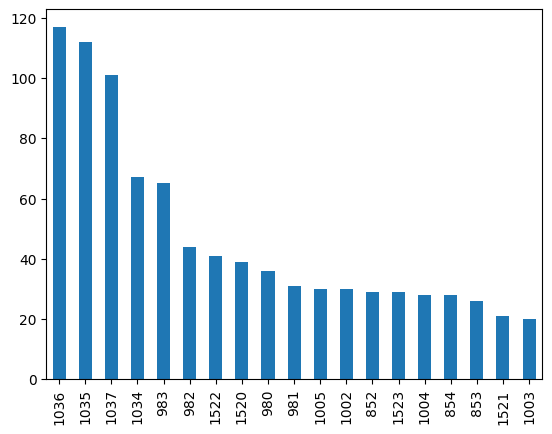

In [93]:
#Quantas vendas cada loja realizou, barras verticais
df["LojaID"].value_counts(ascending=False).plot.bar()

<Axes: >

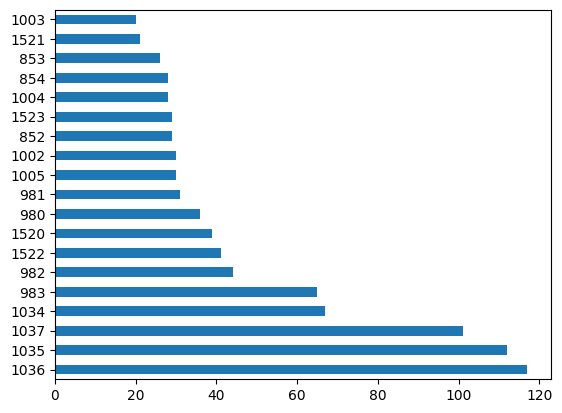

In [94]:
#Quantas vendas cada loja realizou, barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

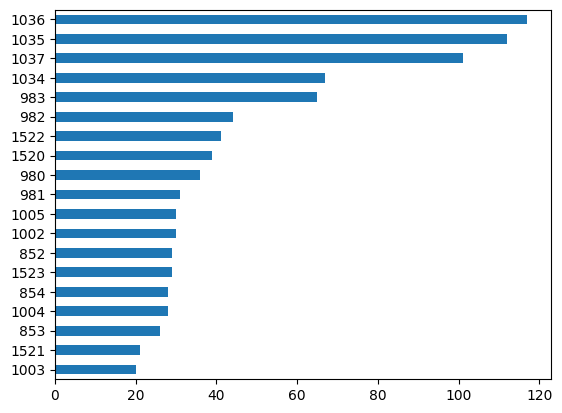

In [96]:
#Quantas vendas cada loja realizou, barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

<Axes: ylabel='Receita'>

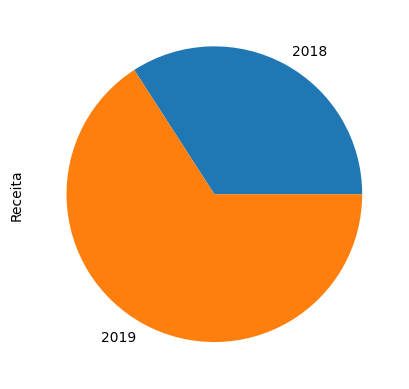

In [97]:
#Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [98]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

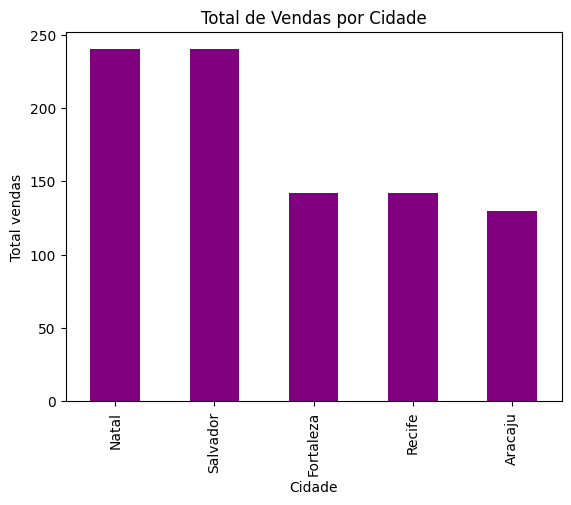

In [104]:
#adicionando um titulo e alternando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title = "Total de Vendas por Cidade", color = "purple")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [105]:
#alterando o estilo
plt.style.use("ggplot")

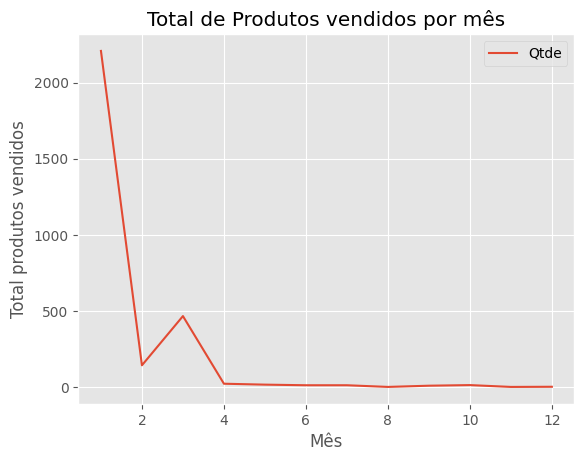

In [109]:
#Total de produtos vendidos por mes
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de Produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend()

In [110]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [112]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

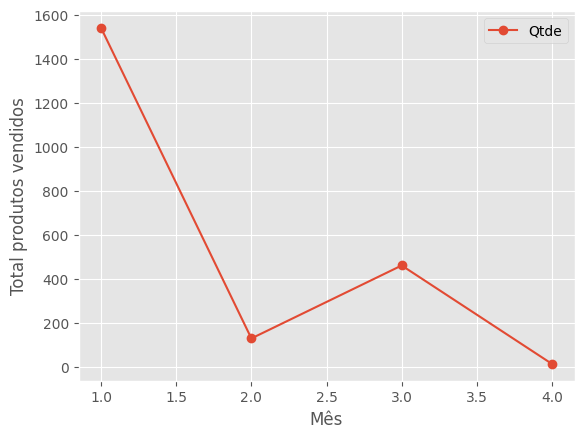

In [115]:
#Total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();

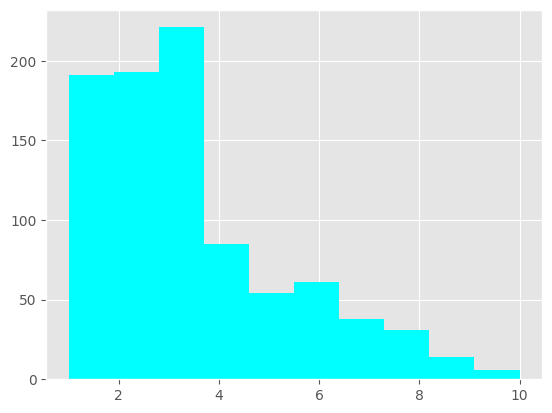

In [118]:
#Histograma
plt.hist(df["Qtde"], color = "cyan");

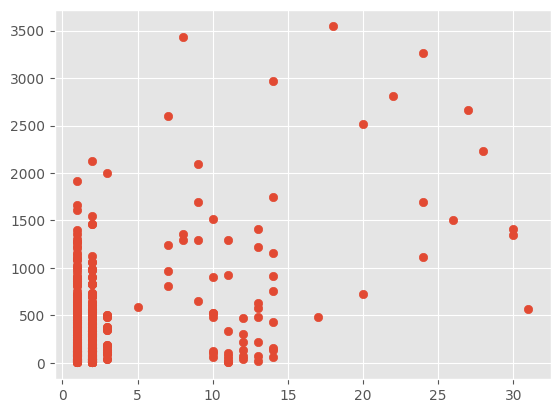

In [119]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

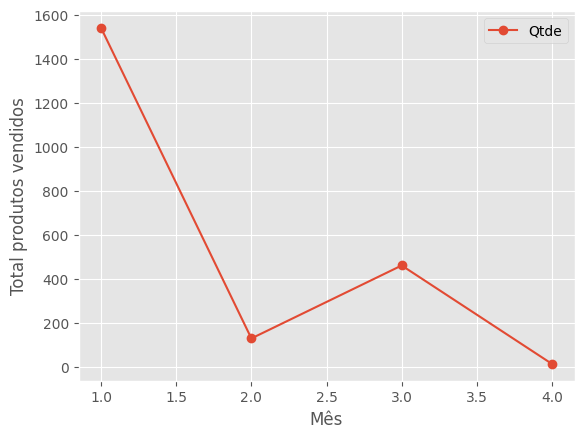

In [121]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos")
plt.legend();
plt.savefig("Grafico mes x Qtde.png")